In [26]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from svm_margin_plot import plot_svm_boundary
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
matrix_data = pan.read_csv("mouse_viral_study.csv")

In [3]:
matrix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
matrix_data.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [5]:
matrix_data.isna().sum().sum()

0

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

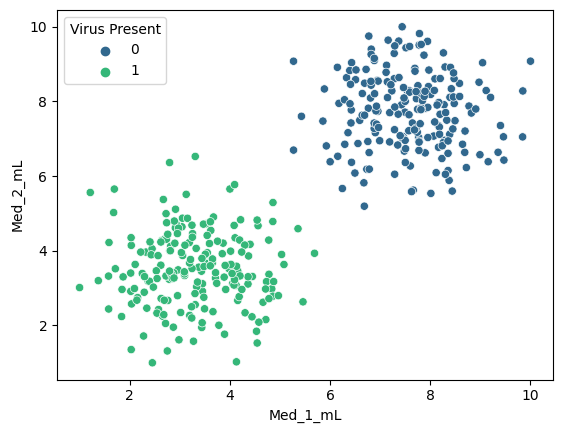

In [6]:
sns.scatterplot(x = matrix_data["Med_1_mL"], y = matrix_data["Med_2_mL"], hue = matrix_data["Virus Present"], palette = "viridis")

In [8]:
features = matrix_data.drop("Virus Present", axis = 1)
label = matrix_data["Virus Present"]

In [10]:
#I know the man is in a hurry, but not scaling and splitting? Preposterous
scaler = StandardScaler()
feature_train, feature_test, label_train, label_test = train_test_split(features, label, random_state = 42, test_size = 0.3)
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

In [11]:
svc_learner = SVC(C = 1000, kernel = "linear")

In [13]:
svc_learner.fit(feature_train, label_train)

SVC(C=1000, kernel='linear')

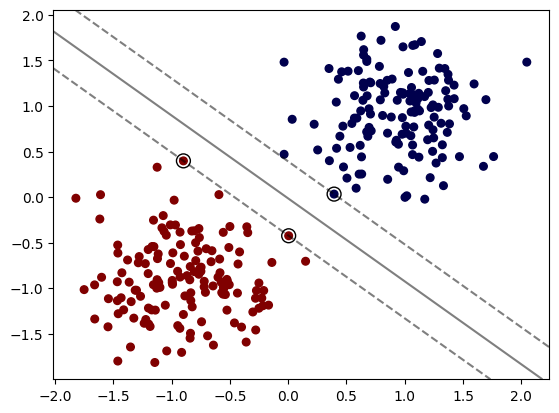

In [16]:
plot_svm_boundary(svc_learner, pan.DataFrame(feature_train), pan.DataFrame(label_train))

In [17]:
another_svc_learner = SVC(C = 0.05, kernel = "linear")
another_svc_learner.fit(feature_train, label_train)

SVC(C=0.05, kernel='linear')

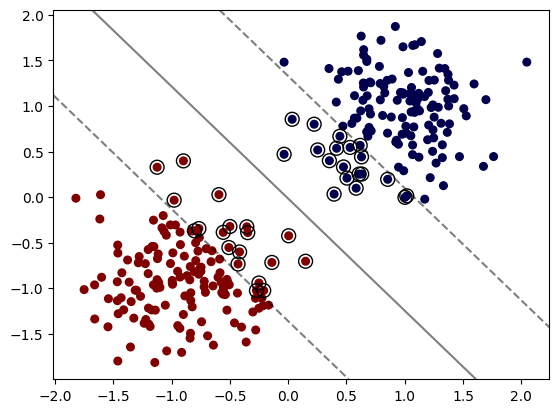

In [18]:
plot_svm_boundary(another_svc_learner, pan.DataFrame(feature_train), pan.DataFrame(label_train))

In [20]:
large_C_pred = svc_learner.predict(feature_test)
small_C_pred = another_svc_learner.predict(feature_test)

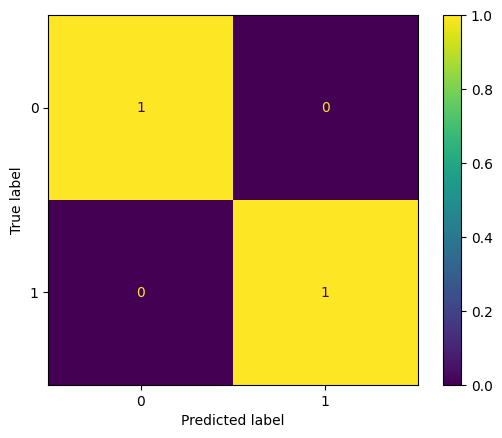

In [23]:
ConfusionMatrixDisplay.from_predictions(label_test, large_C_pred, normalize = "true")

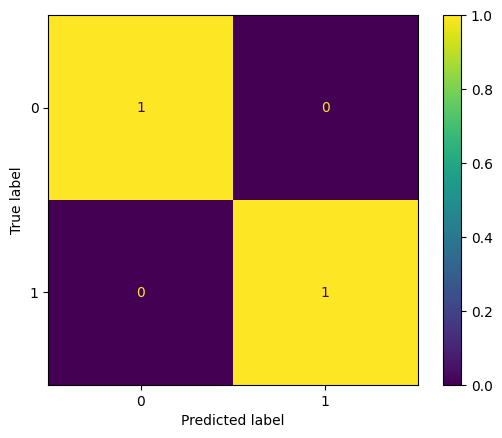

In [24]:
ConfusionMatrixDisplay.from_predictions(label_test, small_C_pred, normalize = "true")

In [29]:
#use grid search to get best k
klearner = KNeighborsClassifier()
params_grid = {"n_neighbors": np.arange(1, 30, 1)}
k_gridder = GridSearchCV(klearner, params_grid, cv = 5, verbose = 1)
k_gridder.fit(feature_train, label_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=1)

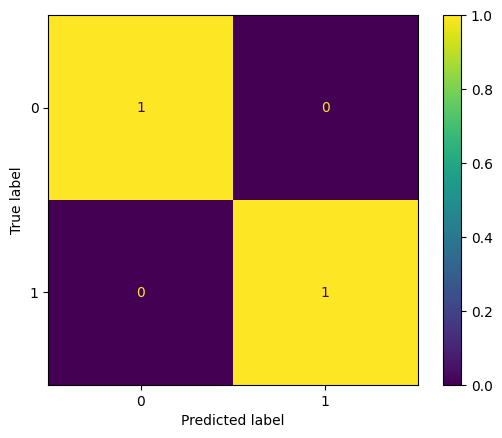

In [32]:
knn_pred = k_gridder.predict(feature_test)
ConfusionMatrixDisplay.from_predictions(label_test, knn_pred, normalize = "true")

In [33]:
k_gridder.cv_results_

{'mean_fit_time': array([0.01687407, 0.00119772, 0.00060406, 0.00099478, 0.00100427,
        0.00099201, 0.00039659, 0.00119767, 0.000598  , 0.00099716,
        0.00099759, 0.00039964, 0.00099716, 0.00119705, 0.00079656,
        0.00019941, 0.00039902, 0.00099945, 0.00079746, 0.00039878,
        0.00099678, 0.00099936, 0.00019941, 0.00079803, 0.000599  ,
        0.00059838, 0.00039573, 0.00059848, 0.00019946]),
 'std_fit_time': array([3.17676087e-02, 4.13738707e-04, 4.93316850e-04, 1.38812858e-05,
        1.42823674e-05, 1.08223157e-03, 4.85716066e-04, 4.02524922e-04,
        4.88266498e-04, 7.32531142e-07, 2.78041453e-07, 4.89472504e-04,
        5.76164530e-07, 3.98659831e-04, 3.98286040e-04, 3.98826599e-04,
        4.88694433e-04, 3.10127498e-06, 3.98732572e-04, 4.88402484e-04,
        1.52587891e-06, 5.06570755e-06, 3.98826599e-04, 3.99017362e-04,
        4.89085079e-04, 4.88577633e-04, 4.84691130e-04, 4.88655508e-04,
        3.98921967e-04]),
 'mean_score_time': array([0.00766554, 

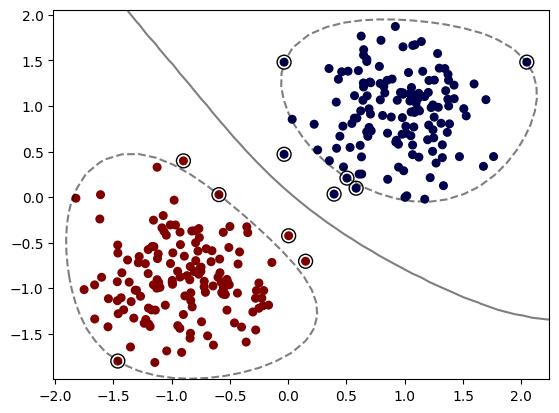

In [51]:
rbf_svc_learner = SVC(kernel = "rbf", C = 1, gamma = "auto")
rbf_svc_learner.fit(feature_train, label_train)
plot_svm_boundary(rbf_svc_learner, pan.DataFrame(feature_train), pan.DataFrame(label_train))